---

## <span style="color:#ED9D4A"> Bellebeat Case Study</span>  
**Na'ol Kebede**
**February 10, 2022**

---

### <span style="color:#ED9D4A"> Table Of Contents</span> 

* [1. Intro](#head_1)
* [2. The business task](#head_2)
* [3. Data information](#head_3)
    * [3.1 Data privacy, accessibility, and reliability](#head_3_1)
    * [3.2 Data and limitations](#head_3_2)
* [4. Clean, Process, and Analysis](#head_4)
    * [4.1 Clean and Process data](#head_4_1)
    * [4.2 Analysis data](#head_4_2)
        * [4.2.1 daily_activity](#head_4_2_1)
        * [4.2.2 Hour and sleep data analysis](#head_4_2_2)
* [5. Conclusion](#head_5)
  * [5.1 Insights](#head_5_1)
  * [5.4 Strategy](#head_5_2)
* [6. Bibliography](#head_6)

---
## <span style="color:#ED9D4A">1. Introduction</span>  <a class="anchor" id="head_1"></a>

<a href="https://bellabeat.com/">Bellabeat</a> is a successful wellness brand for women with an ecosystem of products and services focused on women’s health. Bellabeat develops wearables and accompanying products that monitor biometric and lifestyle data to help women better understand how their bodies work and make healthier choices. As a large player in the global smart device market, there are countless oppurtunities for the data they collect to be used for improvements to their business strategy. 

![Image of Bellabeat Product](https://i.imgur.com/SEKyIy9.jpg)

---
## <span style="color:#ED9D4A">2. The business task</span>  <a class="anchor" id="head_2"></a>

**The business task:**

Analyze secondary smart device data to gain insight into how consumers generally use their smart devices to identify general trends. Then use these trends to create reccomendations for Bellabeat’s marketing strategy.

**Key stakeholders:**
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team.

**Questions:**
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

**Bellabeat products chosen for the analysis:**

*Bellabeat app:* The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

*Leaf:* Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress. At a cheaper price point than the Ivy, more impact could be seen on the Leaf that could be applied to the Ivy later if reccomendations lead to a beneficial return on investment. 

---
## <span style="color:#ED9D4A">3. Data organization </span>  <a class="anchor" id="head_3"></a>

### <span style="color:#ED9D4A">3.1 Data privacy, accessibility, and reliability </span>  <a class="anchor" id="head_3_1"></a>

**Data privacy**

Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. All information was anonymized and made publicly avaliable on kaggle for any purpose.

**Data accessibility**

This <a href="https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf">metadata</a> contains information about the data types and data description. It contains metadata for data not included in this analysis but all relevant information is there.

**Data reliability**

This data was collected through an Amazon MTurk survey. The process for the Fitbit data colllection was 30 MTurk workers who agreed to share their FitBit data with the researchers were routed to a third-party application called Fitabase, where their data was directly streamed from their devices to the Fitabase application. It was on survey particapants to record the relevant information during the month time period that would be collected [[1]](#cite_1).

In 2018, A study with 1000 respondants from the University of Maryland on the demographics and opinions of Amazon Mechanical Turk workers that use health monitoring technologies, and their willingness to provide their health monitoring data for research purposes found some interesting trends [[2]](#cite_2). On demographics, the respondants were a muliracial group of young (74% were between 22 and 37, average 33) and well educated (71% had bachelor's degree or higher) individuals mostly from developed nations. The study did find compared to previous non health monitoring MTurk surveys, male participation was higher for their sample of MTurk workers using health monitoring technologies. It also demonstrated that a large majority use MTurk as a source of income, making it the largest motivational factor for using the service. Although this survey comes two years after the fitabase data was collected, it provides valuable information about the MTurk health monitoring population that we should keep in mind for this analysis. The demographic of interest for Bellabeat products is younger women although it would be best to have survey information to best identify their market population. Income level from the study is below the US average which could be outside of Bellabeats target audience. 

### <span style="color:#ED9D4A">3.2 Data and limitations </span>  <a class="anchor" id="head_3_2"></a>

**Data**

<a href="https://www.kaggle.com/arashnic/fitbit">FitBit Fitness Tracker Data</a> (CC0: Public Domain, dataset made available through <a href="https://www.kaggle.com/arashnic">Mobius</a>): This Kaggle data set contains detailed fitness tracker information from thirty fitbit users between 4/12/2016 and 5/12/2016. The data set contains 18 csv files that range in both wide and long formats. Loading the data into MySQL, there are a number of unique ID's varying from 33 to 8. To reduce redundancy and maintain a reliable sample size, we will focus on 5 of the 18 files

            dailyActivity_merged.csv, hourlyCaloriesNarrow_merged.csv, hourlyIntensitiesNarrow_merged.csv, 
            hourlyStepsNarrow_merged.csv, and sleepDay_merged.csv.

Inital cleaning has been performed in MySQL.

**Data Limitaions**
There are limitation we have to consider during this analysis. There is data is not current (April 2016) and has no demographic information. The sample size is quite small and is not primary data about Bellabeat products. From the study metnioned above, we know that there maybe an overrepresentation of men which could skew the data.

---
## <span style="color:#ED9D4A">4. Clean, Processing, and Analysis </span>  <a class="anchor" id="head_4"></a>

### <span style="color:#ED9D4A">4.1 Clean and Process </span>  <a class="anchor" id="head_4_1"></a>

In [1]:
# Load necessary libraries
library(tidyverse)
library(lubridate)
library(dplyr)
library(skimr)
library(janitor)
library(ggpubr)
library(cowplot)
library(ggrepel)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is masked from ‘package:lubridate’:

    stamp




In [2]:
# load pre cleaned csv data 
daily_activity <- read.csv("../input/FitabaseData4-12-16-5-12-16/daily_activity.csv")
hourly_calories <- read.csv("../input/FitabaseData4-12-16-5-12-16/hourly_calories.csv")
hourly_intensities <- read.csv("../input/FitabaseData4-12-16-5-12-16/hourly_intensities.csv")
hourly_steps <- read.csv("../input/FitabaseData4-12-16-5-12-16/hourly_steps.csv")
sleep_day <- read.csv("../input/FitabaseData4-12-16-5-12-16/sleep_day.csv")

In [3]:
head(daily_activity)

,Id,Dt,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Datet
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,4-12-2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12 00:00:00
2,1503960366,4-13-2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13 00:00:00
3,1503960366,4-14-2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14 00:00:00
4,1503960366,4-15-2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15 00:00:00
5,1503960366,4-16-2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16 00:00:00
6,1503960366,4-17-2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17 00:00:00


*Note: distances are in kilometers*

The first cleaning step is to take the formated Datet from the SQL cleaning and convert it into the appropriate datetime datatype.

In [4]:
# convert char date data into correct datetime data type
daily_activity$Datet <- as.POSIXct(daily_activity$Datet)
hourly_calories$Datet <- as.POSIXct(hourly_calories$Datet)
hourly_intensities$Datet <- as.POSIXct(hourly_intensities$Datet)
hourly_steps$Datet <- as.POSIXct(hourly_steps$Datet)
sleep_day$Datet <- as.POSIXct(sleep_day$Datet)

daily_activity$Id <- as.factor(daily_activity$Id)
hourly_calories$Id <- as.factor(hourly_calories$Id)
hourly_intensities$Id <- as.factor(hourly_intensities$Id)
hourly_steps$Id <- as.factor(hourly_steps$Id)
sleep_day$Id <- as.factor(sleep_day$Id)

#test to check operation
str(hourly_calories)

'data.frame':	22099 obs. of  4 variables:
 $ Id      : Factor w/ 33 levels "1503960366","1624580081",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Dt      : chr  "4-12-2016 12:00:00 AM" "4-12-2016 1:00:00 AM" "4-12-2016 2:00:00 AM" "4-12-2016 3:00:00 AM" ...
 $ Calories: int  81 61 59 47 48 48 48 47 68 141 ...
 $ Datet   : POSIXct, format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" ...


Next, it is important to understand the the unique ID's we have present.

In [5]:
#identify unqiue ID's
n_distinct(daily_activity$Id)  
n_distinct(hourly_calories$Id) 
n_distinct(hourly_intensities$Id) 
n_distinct(hourly_steps$Id) 
n_distinct(sleep_day$Id) 

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

Hear we can see even though there are reportedly 30 participant, there are 33 unique ID's for some data which could some of the participants using more than one device to track data. This is the most likely reason from disscussion of the dataset on Kaggle. It also appears that 6 participants did not keep track of their sleeping data. However, it could be even less if duplicates are included in the sleep data although there is no way to prove either. 

Next, we can check for null or missing data that needs to be removed. A good rule of thumb is for data errors that make up less than 20% of your data is it generally safe to remove them for analysis.

In [6]:
# find total duplicated values for each file
sum(duplicated(daily_activity))
sum(duplicated(hourly_calories))
sum(duplicated(hourly_intensities)) 
sum(duplicated(hourly_steps))
sum(duplicated(sleep_day))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 3

In [7]:
3/nrow(sleep_day)*100

[1] 0.7263923

Since for the dataframe the duplicates make up less than a percent, we can remove them from our data.

In [8]:
# grep finds all indexes where a statement matches a condition,
# that is used to find all values outside of the list returned
sleep_day <- sleep_day[-grep(TRUE,(duplicated(sleep_day))),]

In [9]:
sum(duplicated(sleep_day))

[1] 0

In [10]:
# find all NULL values
sum(is.na(daily_activity))
sum(is.na(hourly_calories))
sum(is.na(hourly_intensities)) 
sum(is.na(hourly_steps))
sum(is.na(sleep_day))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

There are no NA values to remove from the data, so let's move on to a colums in the daily_activity dataframe,
LoggedActivitiesDistance.

In [11]:
length(grep(TRUE, daily_activity$LoggedActivitiesDistance != 0))

[1] 32

In [12]:
32/nrow(daily_activity)*100

[1] 3.404255

Initially, it seemed to me that the total distance and logged distances should be the same. However, we can see that there are only 32 values where the logged distance is not 0. From the metadata file, loggedactivitydistance is the total kilometers from logged activities. Although it is a rather small sub sample of the daily_activity data, it will be interesting to see if any trends are associated with logged distance rather than tracker distance

Lets now look at the domain of attributes to understand if there are values that are not null, but do not fit within an acceptable range.

In [13]:
summary(subset(daily_activity, select = -c(Id, Dt, Datet)))

   TotalSteps    TotalDistance    TrackerDistance  LoggedActivitiesDistance
 Min.   :    0   Min.   : 0.000   Min.   : 0.000   Min.   :0.0000          
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 2.620   1st Qu.:0.0000          
 Median : 7406   Median : 5.245   Median : 5.245   Median :0.0000          
 Mean   : 7638   Mean   : 5.490   Mean   : 5.475   Mean   :0.1082          
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 7.710   3rd Qu.:0.0000          
 Max.   :36019   Max.   :28.030   Max.   :28.030   Max.   :4.9421          
 VeryActiveDistance ModeratelyActiveDistance LightActiveDistance
 Min.   : 0.000     Min.   :0.0000           Min.   : 0.000     
 1st Qu.: 0.000     1st Qu.:0.0000           1st Qu.: 1.945     
 Median : 0.210     Median :0.2400           Median : 3.365     
 Mean   : 1.503     Mean   :0.5675           Mean   : 3.341     
 3rd Qu.: 2.053     3rd Qu.:0.8000           3rd Qu.: 4.782     
 Max.   :21.920     Max.   :6.4800           Max.   :10.710     
 SedentaryAct

**Sedentary Minutes**

In [14]:
#get all rows where people are sedentary for 24 hours
sedentary_24_hr <- daily_activity[grep(TRUE, daily_activity$SedentaryMinutes == 1440),]
head(sedentary_24_hr[order(-sedentary_24_hr$Calories),])
nrow(sedentary_24_hr)
sum(grep(TRUE, sedentary_24_hr$SedentaryActiveDistance != 0))

,Id,Dt,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Datet
,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dttm>
871,8583815059,5-3-2016,12015,9.37,9.37,0,0,0,0,0,0,0,0,1440,3212,2016-05-03
413,4388161847,4-12-2016,10122,7.78,7.78,0,0,0,0,0,0,0,0,1440,2955,2016-04-12
870,8583815059,5-2-2016,8469,6.61,6.61,0,0,0,0,0,0,0,0,1440,2894,2016-05-02
854,8583815059,4-16-2016,5319,4.15,4.15,0,0,0,0,0,0,0,0,1440,2693,2016-04-16
872,8583815059,5-4-2016,3588,2.80,2.80,0,0,0,0,0,0,0,0,1440,2516,2016-05-04
855,8583815059,4-17-2016,3008,2.35,2.35,0,0,0,0,0,0,0,0,1440,2439,2016-04-17


[1] 79

[1] 0

There are 79 rows where the sedentary time is reported as 24 hours with the maximum calories being burned at 3212. While a person may spend the whole day doing sedentary activities, it seems quite odd that they could have their total steps and distance tracked while the distance based on intensity is zero. I think its fair to assume that the intensity data for both minutes and distance was not recored and a default value of 1440 sedentary minutes was used as a subsitute.

In [15]:
daily_activity <- daily_activity[grep(FALSE, daily_activity$SedentaryMinutes == 1440),]

**Calories**

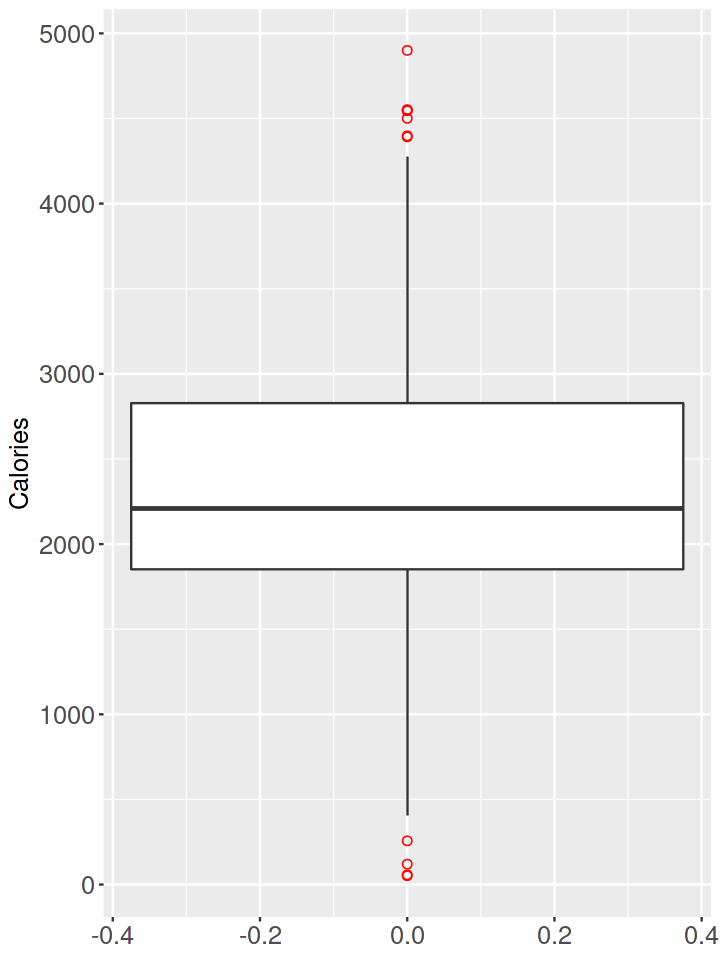

In [16]:
#Visualizing the spread of calorie data
options(repr.plot.width=6, repr.plot.height=8)
ggplot(daily_activity, aes(x= Calories)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=1, outlier.size=2, notch=FALSE) +
    coord_flip() +
    theme(axis.title = element_text(size = 15), axis.text = element_text(size=15) ) 

In [17]:
#get all rows where people had less than burned 900 calories
daily_activity[grep(TRUE, daily_activity$Calories < 900),]

,Id,Dt,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Datet
,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dttm>
123,1844505072,5-12-2016,0,0.00,0.00,0,0.00,0.0,0.00,0,0,0,0,711,665,2016-05-12
265,2347167796,4-29-2016,42,0.03,0.03,0,0.00,0.0,0.03,0,0,0,4,2,403,2016-04-29
346,3977333714,5-11-2016,746,0.50,0.50,0,0.37,0.0,0.13,0,4,0,9,13,52,2016-05-11
412,4319703577,5-12-2016,17,0.01,0.01,0,0.00,0.0,0.01,0,0,0,2,0,257,2016-05-12
567,5553957443,5-12-2016,3121,2.04,2.04,0,0.58,0.4,1.06,0,8,6,48,222,741,2016-05-12
737,7007744171,5-7-2016,0,0.00,0.00,0,0.00,0.0,0.00,0,0,0,0,111,120,2016-05-07
909,8792009665,5-10-2016,0,0.00,0.00,0,0.00,0.0,0.00,0,0,0,0,48,57,2016-05-10


Every individual has a RMR, Resting Metabolic Rate, which is the amount of calories necessary to pump blood through the body, breath, and other autonomic functions. The lowest sensible RMR would be around 900 which is about 3.5 standard deviations away from the female average RMR which includes over 99% of the population. These values were most likely tracked incorrected and should not be used for analysis.

In [18]:
daily_activity <- daily_activity[grep(FALSE, daily_activity$Calories < 900),]

**Total Steps**

In [19]:
# find rows where someone travelled any distance but took no steps
daily_activity[grep(TRUE, daily_activity$TotalSteps == 0 & daily_activity$TotalDistance >0),]

Id,Dt,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Datet
<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dttm>


In [20]:
# find rows where someone took no steps
no_steps <- daily_activity[grep(TRUE, daily_activity$TotalSteps == 0),]
head(no_steps[order(-no_steps$Calories),])

,Id,Dt,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Datet
,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dttm>
637,6290855005,4-23-2016,0,0,0,0,0,0,0,0,33,0,0,1407,2664,2016-04-23
154,1927972279,5-12-2016,0,0,0,0,0,0,0,0,0,0,0,966,1383,2016-05-12


There appears to be only one value that is invalid for total steps as it does not seem likely that someone would spend 33 minutes very active and not move any distance. All other values seem to fall into an acceptable range since they have a recorded calorie value and all their time was spent sedentary.

In [21]:
daily_activity <- daily_activity[-grep(TRUE, daily_activity$TotalSteps == 0 & daily_activity$VeryActiveMinutes >0),]

In [22]:
summary(hourly_calories)

          Id             Dt               Calories     
 1624580081:  736   Length:22099       Min.   : 42.00  
 1927972279:  736   Class :character   1st Qu.: 63.00  
 2022484408:  736   Mode  :character   Median : 83.00  
 2026352035:  736                      Mean   : 97.39  
 2873212765:  736                      3rd Qu.:108.00  
 4558609924:  736                      Max.   :948.00  
 (Other)   :17683                                      
     Datet                    
 Min.   :2016-04-12 00:00:00  
 1st Qu.:2016-04-19 01:00:00  
 Median :2016-04-26 06:00:00  
 Mean   :2016-04-26 11:46:42  
 3rd Qu.:2016-05-03 19:00:00  
 Max.   :2016-05-12 15:00:00  
                              

In [23]:
summary(hourly_intensities)

          Id             Dt            TotalIntensity   AverageIntensity
 1624580081:  736   Length:22099       Min.   :  0.00   Min.   :0.0000  
 1927972279:  736   Class :character   1st Qu.:  0.00   1st Qu.:0.0000  
 2022484408:  736   Mode  :character   Median :  3.00   Median :0.0500  
 2026352035:  736                      Mean   : 12.04   Mean   :0.2006  
 2873212765:  736                      3rd Qu.: 16.00   3rd Qu.:0.2667  
 4558609924:  736                      Max.   :180.00   Max.   :3.0000  
 (Other)   :17683                                                       
     Datet                    
 Min.   :2016-04-12 00:00:00  
 1st Qu.:2016-04-19 01:00:00  
 Median :2016-04-26 06:00:00  
 Mean   :2016-04-26 11:46:42  
 3rd Qu.:2016-05-03 19:00:00  
 Max.   :2016-05-12 15:00:00  
                              

In [24]:
summary(hourly_steps)

          Id             Dt                Steps        
 1624580081:  736   Length:22099       Min.   :    0.0  
 1927972279:  736   Class :character   1st Qu.:    0.0  
 2022484408:  736   Mode  :character   Median :   40.0  
 2026352035:  736                      Mean   :  320.2  
 2873212765:  736                      3rd Qu.:  357.0  
 4558609924:  736                      Max.   :10554.0  
 (Other)   :17683                                       
     Datet                    
 Min.   :2016-04-12 00:00:00  
 1st Qu.:2016-04-19 01:00:00  
 Median :2016-04-26 06:00:00  
 Mean   :2016-04-26 11:46:42  
 3rd Qu.:2016-05-03 19:00:00  
 Max.   :2016-05-12 15:00:00  
                              

In [25]:
summary(sleep_day)

          Id           Dt            TotalSleepRecords TotalMinutesAsleep
 5553957443: 31   Length:410         Min.   :1.00      Min.   : 58.0     
 6962181067: 31   Class :character   1st Qu.:1.00      1st Qu.:361.0     
 8378563200: 31   Mode  :character   Median :1.00      Median :432.5     
 2026352035: 28                      Mean   :1.12      Mean   :419.2     
 3977333714: 28                      3rd Qu.:1.00      3rd Qu.:490.0     
 4445114986: 28                      Max.   :3.00      Max.   :796.0     
 (Other)   :233                                                          
 TotalTimeInBed      Datet                    
 Min.   : 61.0   Min.   :2016-04-12 00:00:00  
 1st Qu.:403.8   1st Qu.:2016-04-19 00:00:00  
 Median :463.0   Median :2016-04-27 00:00:00  
 Mean   :458.5   Mean   :2016-04-26 11:38:55  
 3rd Qu.:526.0   3rd Qu.:2016-05-04 00:00:00  
 Max.   :961.0   Max.   :2016-05-12 00:00:00  
                                              

For the other data files, there does not seem to be irregularities with the ranges of attribute values. All files are ready for analysis.

---
### <span style="color:#ED9D4A">4.2 Analysis</span>  <a class="anchor" id="head_4_2"></a>
#### <span style="color:#ED9D4A">4.2.1 daily_activities</span>  <a class="anchor" id="head_4_2_1"></a>

In [26]:
# create dataframe for rows with logged activitese
daily_with_log <- daily_activity[grep(TRUE, daily_activity$LoggedActivitiesDistance != 0),]

In [27]:
cor(subset(daily_activity, select = -c(Id, Dt, Datet)))

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
TotalSteps,1.00000000,0.98258776,0.98186648,0.17732321,0.756361361,0.479694500,0.60991763,0.044818862,0.665227918,0.46515576,0.43789324,-0.218397161,0.55762918
TotalDistance,0.98258776,1.00000000,0.99939385,0.18346509,0.811228859,0.437843888,0.58198623,0.059710950,0.677257917,0.42451374,0.38316833,-0.179505902,0.62284676
TrackerDistance,0.98186648,0.99939385,1.00000000,0.15495474,0.811157032,0.437330977,0.58096507,0.051032059,0.676845353,0.42481969,0.38071753,-0.180892590,0.62323174
LoggedActivitiesDistance,0.17732321,0.18346509,0.15495474,1.00000000,0.143404241,0.066680999,0.12821789,0.151706453,0.228377236,0.04290768,0.08574231,-0.031005463,0.20954121
VeryActiveDistance,0.75636136,0.81122886,0.81115703,0.14340424,1.000000000,0.162386357,0.07641757,0.034228813,0.820855295,0.18008832,-0.05046813,0.006399865,0.49030862
ModeratelyActiveDistance,0.47969450,0.43784389,0.43733098,0.06668100,0.162386357,1.000000000,0.15745974,-0.008633607,0.192461242,0.94457634,0.05859305,-0.172626327,0.17931566
LightActiveDistance,0.60991763,0.58198623,0.58096507,0.12821789,0.076417569,0.157459738,1.00000000,0.074124290,0.060077583,0.12909702,0.83974120,-0.300710217,0.41343719
SedentaryActiveDistance,0.04481886,0.05971095,0.05103206,0.15170645,0.034228813,-0.008633607,0.07412429,1.000000000,-0.005915374,-0.03843502,0.10293061,0.071290877,0.02660364
VeryActiveMinutes,0.66522792,0.67725792,0.67684535,0.22837724,0.820855295,0.192461242,0.06007758,-0.005915374,1.000000000,0.28140886,-0.07550098,-0.106862801,0.62214122
FairlyActiveMinutes,0.46515576,0.42451374,0.42481969,0.04290768,0.180088325,0.944576342,0.12909702,-0.038435025,0.281408856,1.00000000,0.03391587,-0.187572669,0.26591121


In [28]:
cor(subset(daily_with_log, select = -c(Id, Dt, Datet)))

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
TotalSteps,1.00000000,0.98690864,0.955637180,0.68915783,0.768170495,0.537240676,0.62426161,0.056001445,0.02707353,0.5786939,0.72289176,0.191976013,-0.20748986
TotalDistance,0.98690864,1.00000000,0.977126725,0.63126921,0.806839267,0.522588108,0.60377497,0.057995835,0.15414266,0.5367536,0.64710223,0.112490660,-0.09602796
TrackerDistance,0.95563718,0.97712672,1.000000000,0.47397439,0.820566112,0.459545525,0.56956979,-0.019771302,0.30491099,0.4818339,0.52959045,-0.008767722,0.05506843
LoggedActivitiesDistance,0.68915783,0.63126921,0.473974393,1.00000000,0.348747257,0.425271910,0.55712216,0.094530373,-0.54112522,0.5124950,0.88567010,0.575480770,-0.60128964
VeryActiveDistance,0.76817049,0.80683927,0.820566112,0.34874726,1.000000000,0.279281411,0.06877672,-0.003876765,0.40440019,0.3767248,0.24869036,0.106475036,-0.02301008
ModeratelyActiveDistance,0.53724068,0.52258811,0.459545525,0.42527191,0.279281411,1.000000000,0.18745659,0.574661079,-0.23555122,0.8151781,0.33355996,0.007751084,-0.42252138
LightActiveDistance,0.62426161,0.60377497,0.569569788,0.55712216,0.068776719,0.187456587,1.00000000,-0.145491367,-0.14458400,0.1588839,0.76742849,0.060328178,0.04034806
SedentaryActiveDistance,0.05600145,0.05799584,-0.019771302,0.09453037,-0.003876765,0.574661079,-0.14549137,1.000000000,-0.26344049,0.3345360,0.07339744,-0.256754287,-0.47246330
VeryActiveMinutes,0.02707353,0.15414266,0.304910993,-0.54112522,0.404400193,-0.235551223,-0.14458400,-0.263440487,1.00000000,-0.2666487,-0.52653143,-0.550668212,0.85272869
FairlyActiveMinutes,0.57869392,0.53675356,0.481833908,0.51249503,0.376724771,0.815178122,0.15888389,0.334536013,-0.26664865,1.0000000,0.37748696,0.253943272,-0.42910177


`geom_smooth()` using formula 'y ~ x'



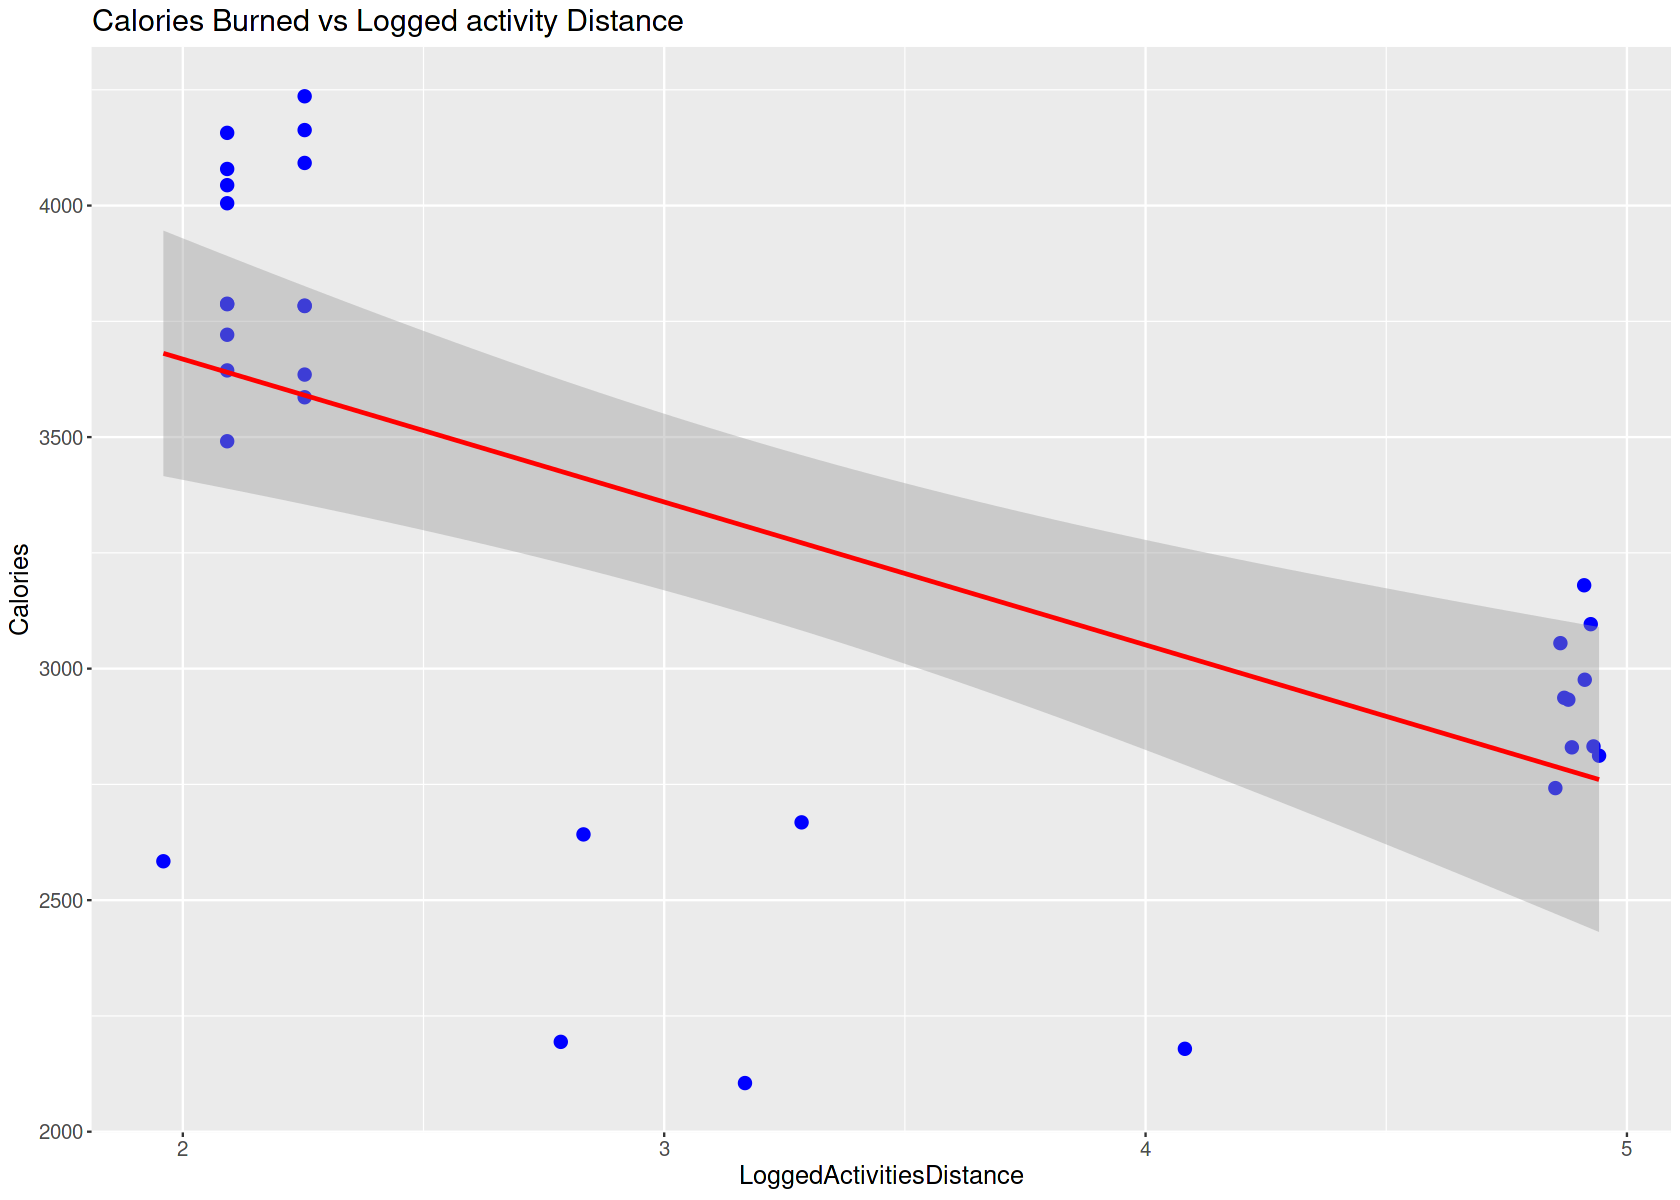

In [29]:
# plot relationship between logged distance and Calories
options(repr.plot.width=14, repr.plot.height=10)
ggplot(daily_with_log, aes(x= LoggedActivitiesDistance, y= Calories)) +
    geom_point(size= 3, color='blue') +
    geom_smooth(method= 'lm', color= 'red') +
    labs(title = "Calories Burned vs Logged activity Distance") + 
    theme(text = element_text(size = 15) )  

`geom_smooth()` using formula 'y ~ x'



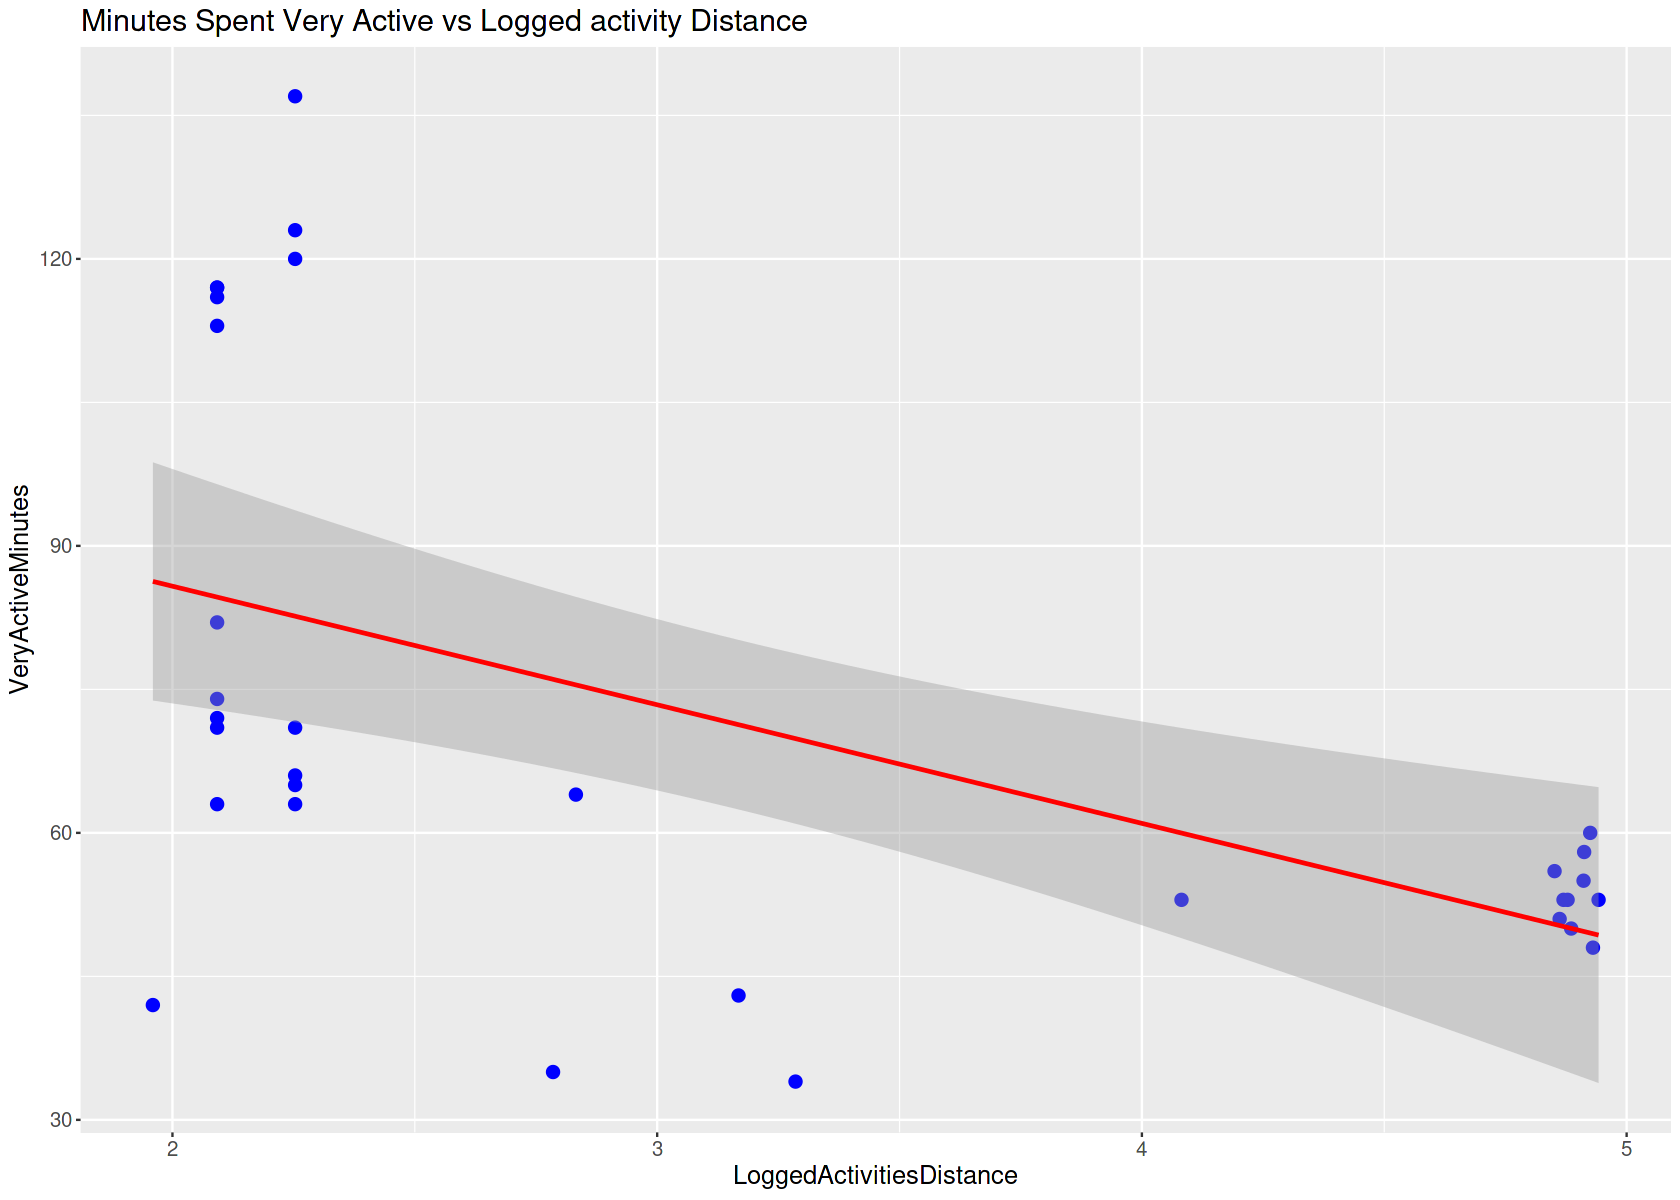

In [30]:
# plot relationship between logged distance and very active activity time
ggplot(daily_with_log, aes(x= LoggedActivitiesDistance, y= VeryActiveMinutes)) +
    geom_point(size= 3, color='blue') +
    geom_smooth(method= 'lm', color= 'red') +
    labs(title = "Minutes Spent Very Active vs Logged activity Distance") + 
    theme(text = element_text(size = 15) )  

In [31]:
paste('Avg Calories not logged:', floor(mean(daily_activity[grep(FALSE, daily_activity$LoggedActivitiesDistance != 0),]$Calories)))
paste('Avg Calories logged:', mean(daily_with_log$Calories))

[1] "Avg Calories not logged: 2330"

[1] "Avg Calories logged: 3305"

Logged Acitity Findings:
* We can see that comparing daily_activities based on logged activities, although the average calories burned is higher when activities are logged, there is a negative corelation between the two variables. Now this is unintuitive since the more distance a person travels, the more calories they should burn. But this also depends on the intensity of the activity. Since there is also a negative correlation with very active minutes, this could be why we see this trend.


* Now again working with a small part of the data like this it may be due to chance we see this trend, however data on short intense activites that can motivate individuals to be more active should be gathered to better identify the validity of this connection.

In [32]:
cor(subset(sleep_day, select = -c(Id, Dt, Datet)))

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
TotalSleepRecords,1.0000000,0.1670393,0.1735677
TotalMinutesAsleep,0.1670393,1.0000000,0.9304224
TotalTimeInBed,0.1735677,0.9304224,1.0000000


In [33]:
# combine activity types with sleep through a data merge
activity_sleep <- merge(daily_activity, sleep_day, by = c("Id", "Datet"), all = TRUE) 
head(activity_sleep[grep(FALSE,is.na(activity_sleep$Dt.y)),])

,Id,Datet,Dt.x,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Dt.y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<fct>,<dttm>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1,1503960366,2016-04-12,4-12-2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,4-12-2016 12:00:00 AM,1,327,346
2,1503960366,2016-04-13,4-13-2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,4-13-2016 12:00:00 AM,2,384,407
4,1503960366,2016-04-15,4-15-2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,4-15-2016 12:00:00 AM,1,412,442
5,1503960366,2016-04-16,4-16-2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,4-16-2016 12:00:00 AM,2,340,367
6,1503960366,2016-04-17,4-17-2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,4-17-2016 12:00:00 AM,1,700,712
8,1503960366,2016-04-19,4-19-2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,4-19-2016 12:00:00 AM,1,304,320


In [34]:
# group data based on the activity type and convert type into column
By_activity_type <- activity_sleep %>% 
    select(Id, Datet, TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories)
By_activity_type <- relocate(By_activity_type, Calories, .before = TotalSteps)
By_activity_type$Id <- as.factor(By_activity_type$Id)

By_activity_type <- pivot_longer(By_activity_type, 5:8, names_to= "ActivityType", values_to= "Minutes")
head(By_activity_type)

Id,Datet,Calories,TotalSteps,ActivityType,Minutes
<fct>,<dttm>,<int>,<int>,<chr>,<int>
1503960366,2016-04-12,1985,13162,VeryActiveMinutes,25
1503960366,2016-04-12,1985,13162,FairlyActiveMinutes,13
1503960366,2016-04-12,1985,13162,LightlyActiveMinutes,328
1503960366,2016-04-12,1985,13162,SedentaryMinutes,728
1503960366,2016-04-13,1797,10735,VeryActiveMinutes,21
1503960366,2016-04-13,1797,10735,FairlyActiveMinutes,19


`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



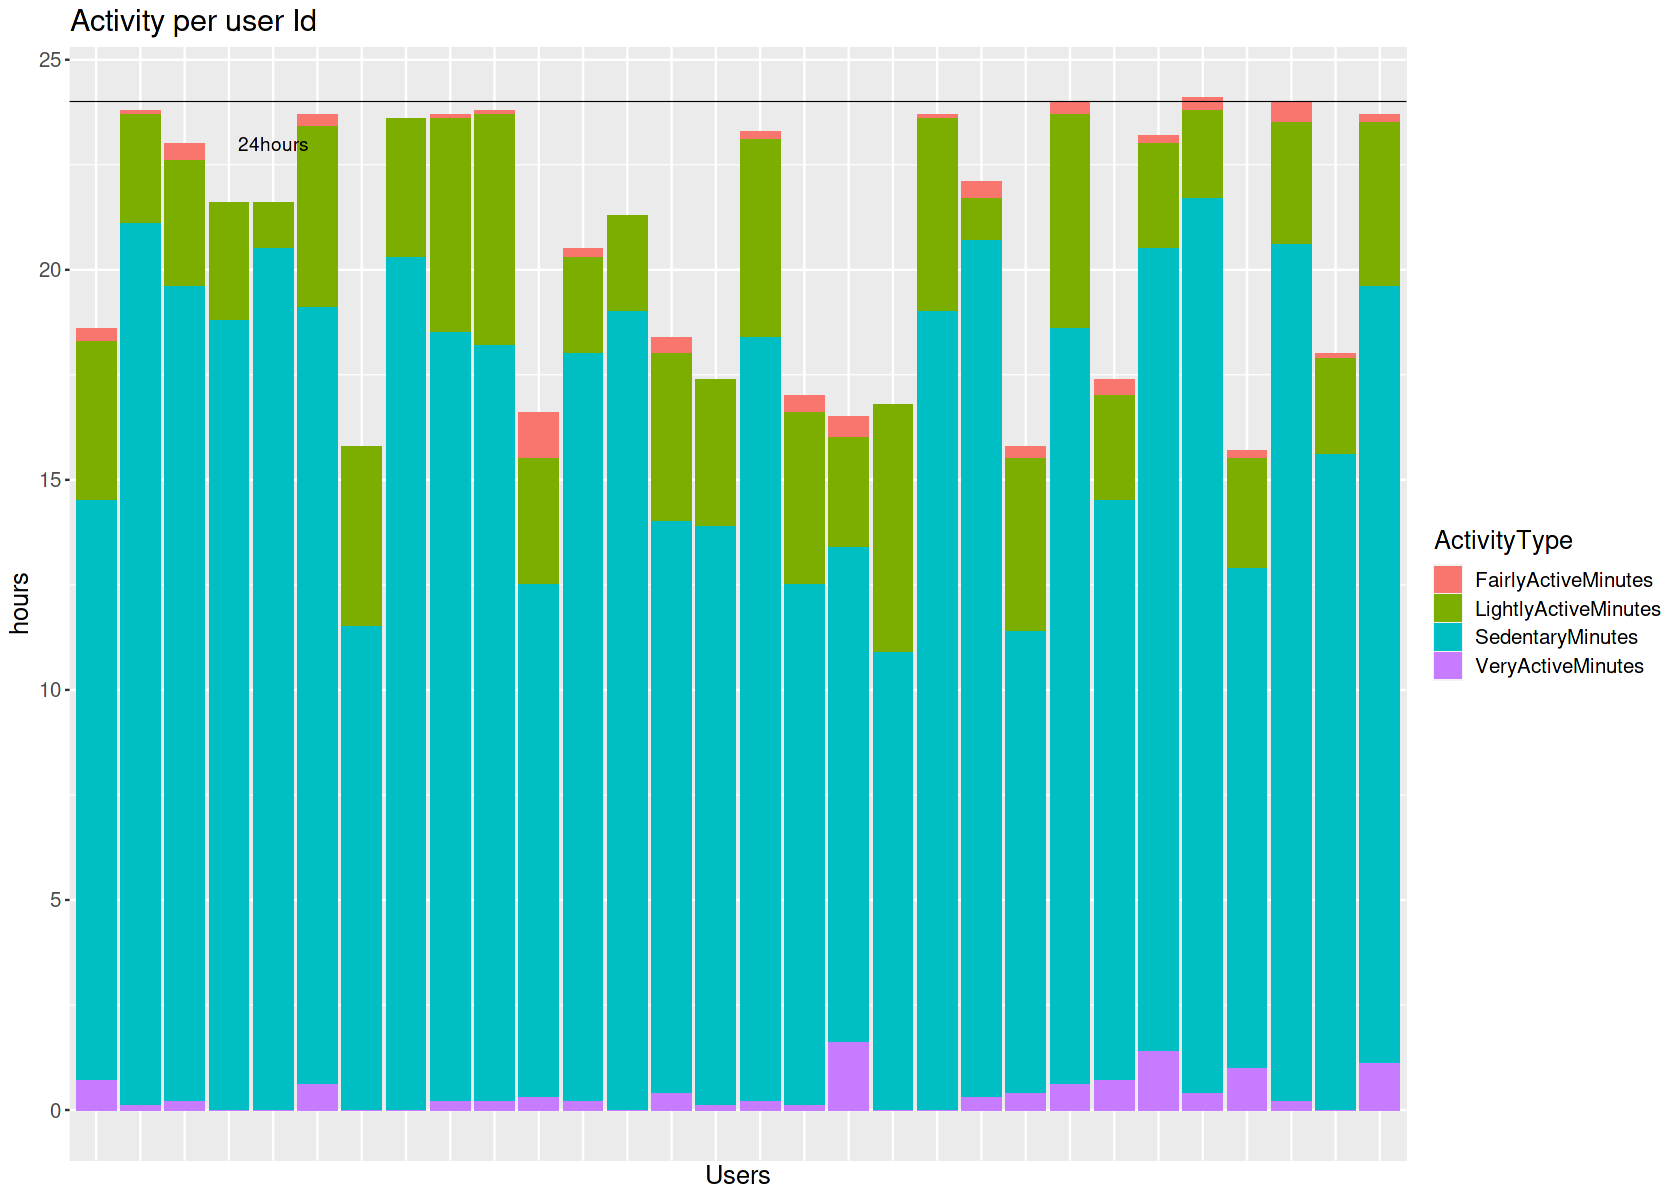

In [35]:
# get the average activity time per user and plot bar graph showing time distribution
By_intensity_type_avg <- By_activity_type %>%
    group_by(Id, ActivityType) %>%
    summarise(hours= round(mean(Minutes)/60,1)) %>%
    na.omit()

ggplot(By_intensity_type_avg) +
    geom_bar(stat= "identity", aes(x= Id, y= hours, fill= ActivityType)) +
    geom_hline(yintercept= 24, color= "black", size= .25) +
    annotate("text", x = 5, y = 23, label = "24hours") +
    labs(title = "Activity per user Id", x = "Users") + 
    guides(x = "none") +
    theme(text = element_text(size = 15))    

In [36]:
# find proportion of time users spend in each activity
daily_activity$TotalMinutes <- daily_activity$VeryActiveMinutes + daily_activity$FairlyActiveMinutes + daily_activity$LightlyActiveMinutes + daily_activity$SedentaryMinutes
TotalReportedMinutes <- sum(daily_activity$VeryActiveMinutes) + sum(daily_activity$FairlyActiveMinutes) + sum(daily_activity$LightlyActiveMinutes) + sum(daily_activity$SedentaryMinutes)

In [37]:
paste("Very Active:", sum(daily_activity$VeryActiveMinutes) / TotalReportedMinutes * 100, "%")
paste("Fairly Active:", sum(daily_activity$FairlyActiveMinutes) / TotalReportedMinutes * 100, "%")
paste("Lightly Active:", sum(daily_activity$LightlyActiveMinutes) / TotalReportedMinutes * 100, "%")
paste("Sedentary:", sum(daily_activity$SedentaryMinutes) / TotalReportedMinutes * 100, "%")

[1] "Very Active: 1.92860751622556 %"

[1] "Fairly Active: 1.23829233220629 %"

[1] "Lightly Active: 17.6033772492324 %"

[1] "Sedentary: 79.2297229023357 %"

It appears that sleep data and sedentary data may overlap each other as the reported times can be up to 24 hours for some users. Users spending 3-5 hours lightly active and 0-3 hour doin more intense activites. It seems that being more active is not as consistent as lighter activites, which is where the health managment device could help user be more aware of how they are spending their time. Also, some of the time spent sedentary could be used for more light activities, where a small reminder from the device could be enough to increase minutes active.

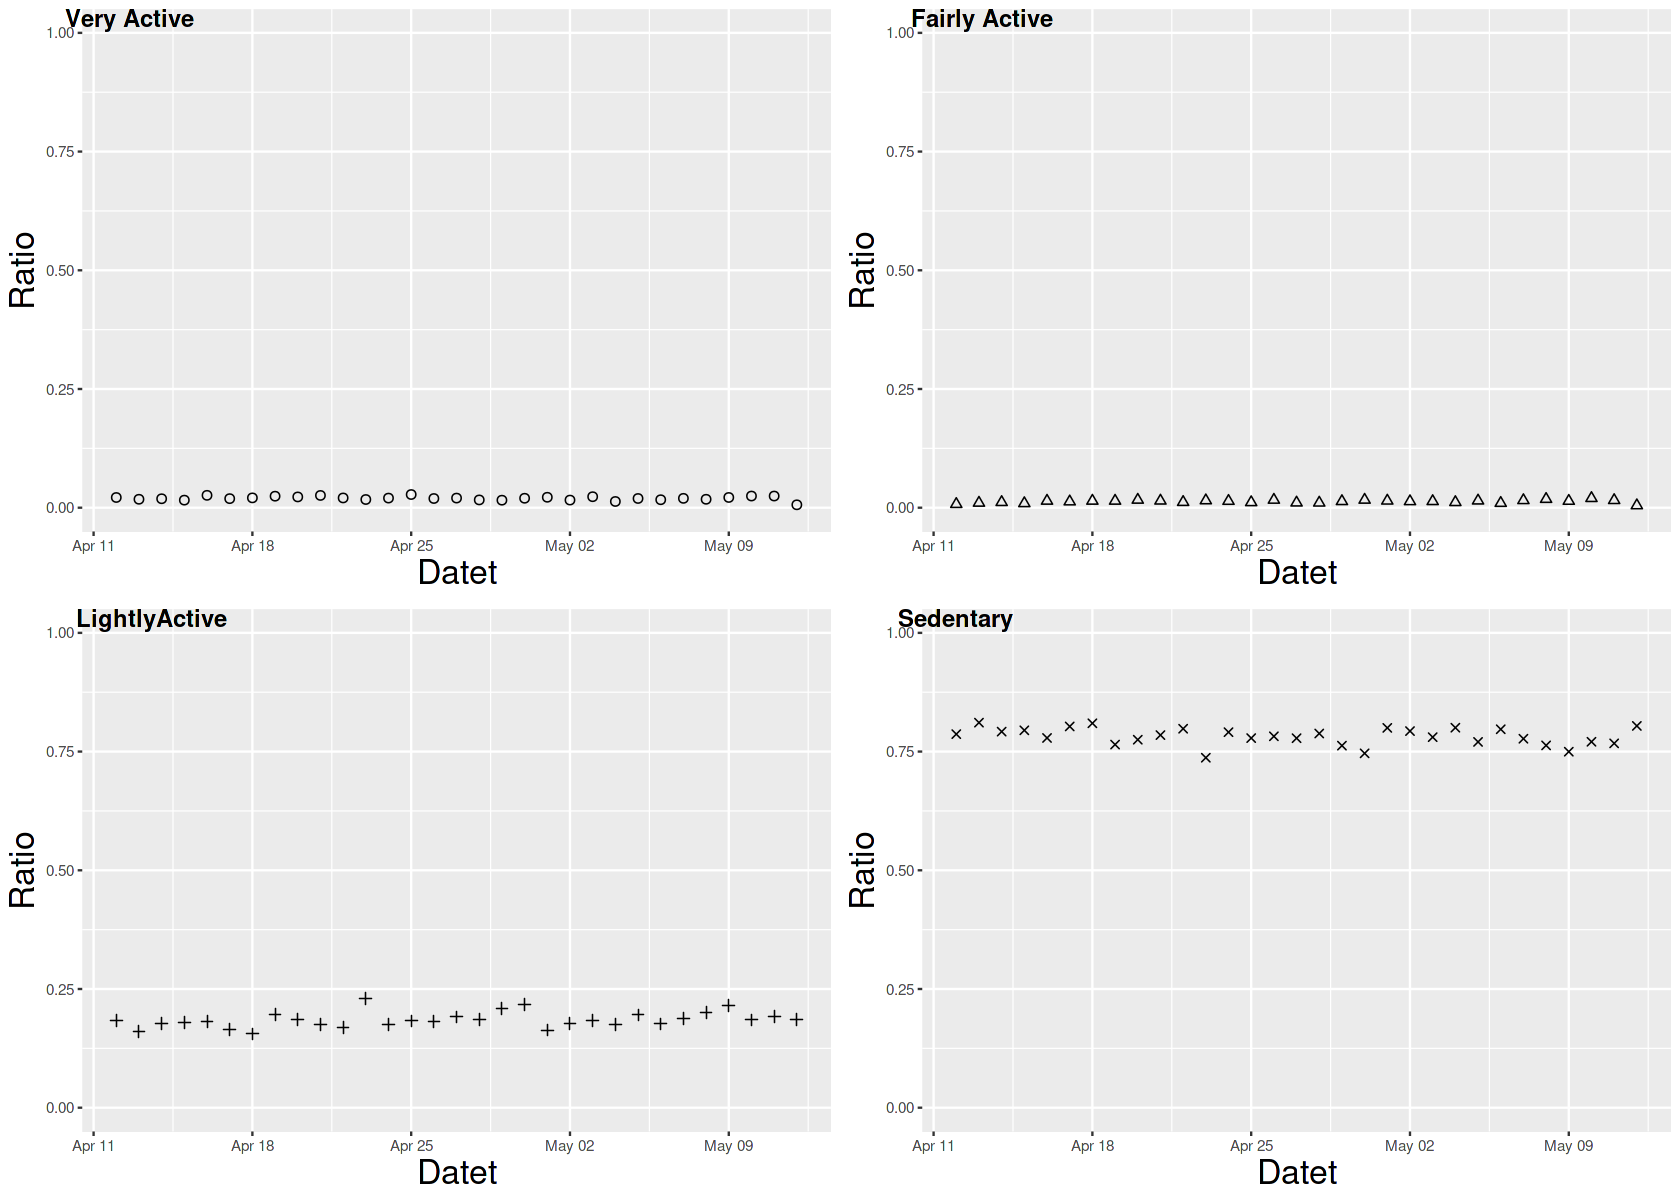

In [38]:
va <- ggplot(daily_activity %>%
    group_by(Datet) %>%
    summarize(Ratio = mean(VeryActiveMinutes / TotalMinutes)), aes(x = Datet, y = Ratio)) + 
    geom_point(size= 2, shape= 1) +
    ylim(0, 1) +
    theme(axis.title = element_text(size = 20))    
fa <- ggplot(daily_activity %>%
    group_by(Datet) %>%
    summarize(Ratio = mean(FairlyActiveMinutes / TotalMinutes)), aes(x = Datet, y = Ratio)) + 
    geom_point(size= 2, shape= 2) +
    ylim(0, 1) +
    theme(axis.title = element_text(size = 20)) 
li <- ggplot(daily_activity %>%
    group_by(Datet) %>%
    summarize(Ratio = mean(LightlyActiveMinutes / TotalMinutes)), aes(x = Datet, y = Ratio)) + 
    geom_point(size= 2, shape= 3) +
    ylim(0, 1) +
    theme(axis.title = element_text(size = 20)) 
se <- ggplot(daily_activity %>%
    group_by(Datet) %>%
    summarize(Ratio = mean(SedentaryMinutes / TotalMinutes)), aes(x = Datet, y = Ratio)) + 
    geom_point(size= 2, shape= 4) +
    ylim(0, 1) +
    theme(axis.title = element_text(size = 20)) 

plot_grid(va, fa, li, se, labels=c("Very Active", "Fairly Active", "LightlyActive", "Sedentary"), ncol = 2, nrow = 2)

It also appears that over the month the time spent in each activity type remains relatively the same.

In [39]:
# Getting the average calorie burned for an individual based on day
activity_calorie_avg <- activity_sleep %>% 
  group_by(Id) %>% 
  summarise(Calories = round(mean(Calories, na.rm = TRUE)))

cal_avg <- mean(activity_calorie_avg$Calories)
head(activity_calorie_avg)
cal_avg

Id,Calories
<fct>,<dbl>
1503960366,1877
1624580081,1483
1644430081,2811
1844505072,1714
1927972279,2252
2022484408,2510


[1] 2348.273

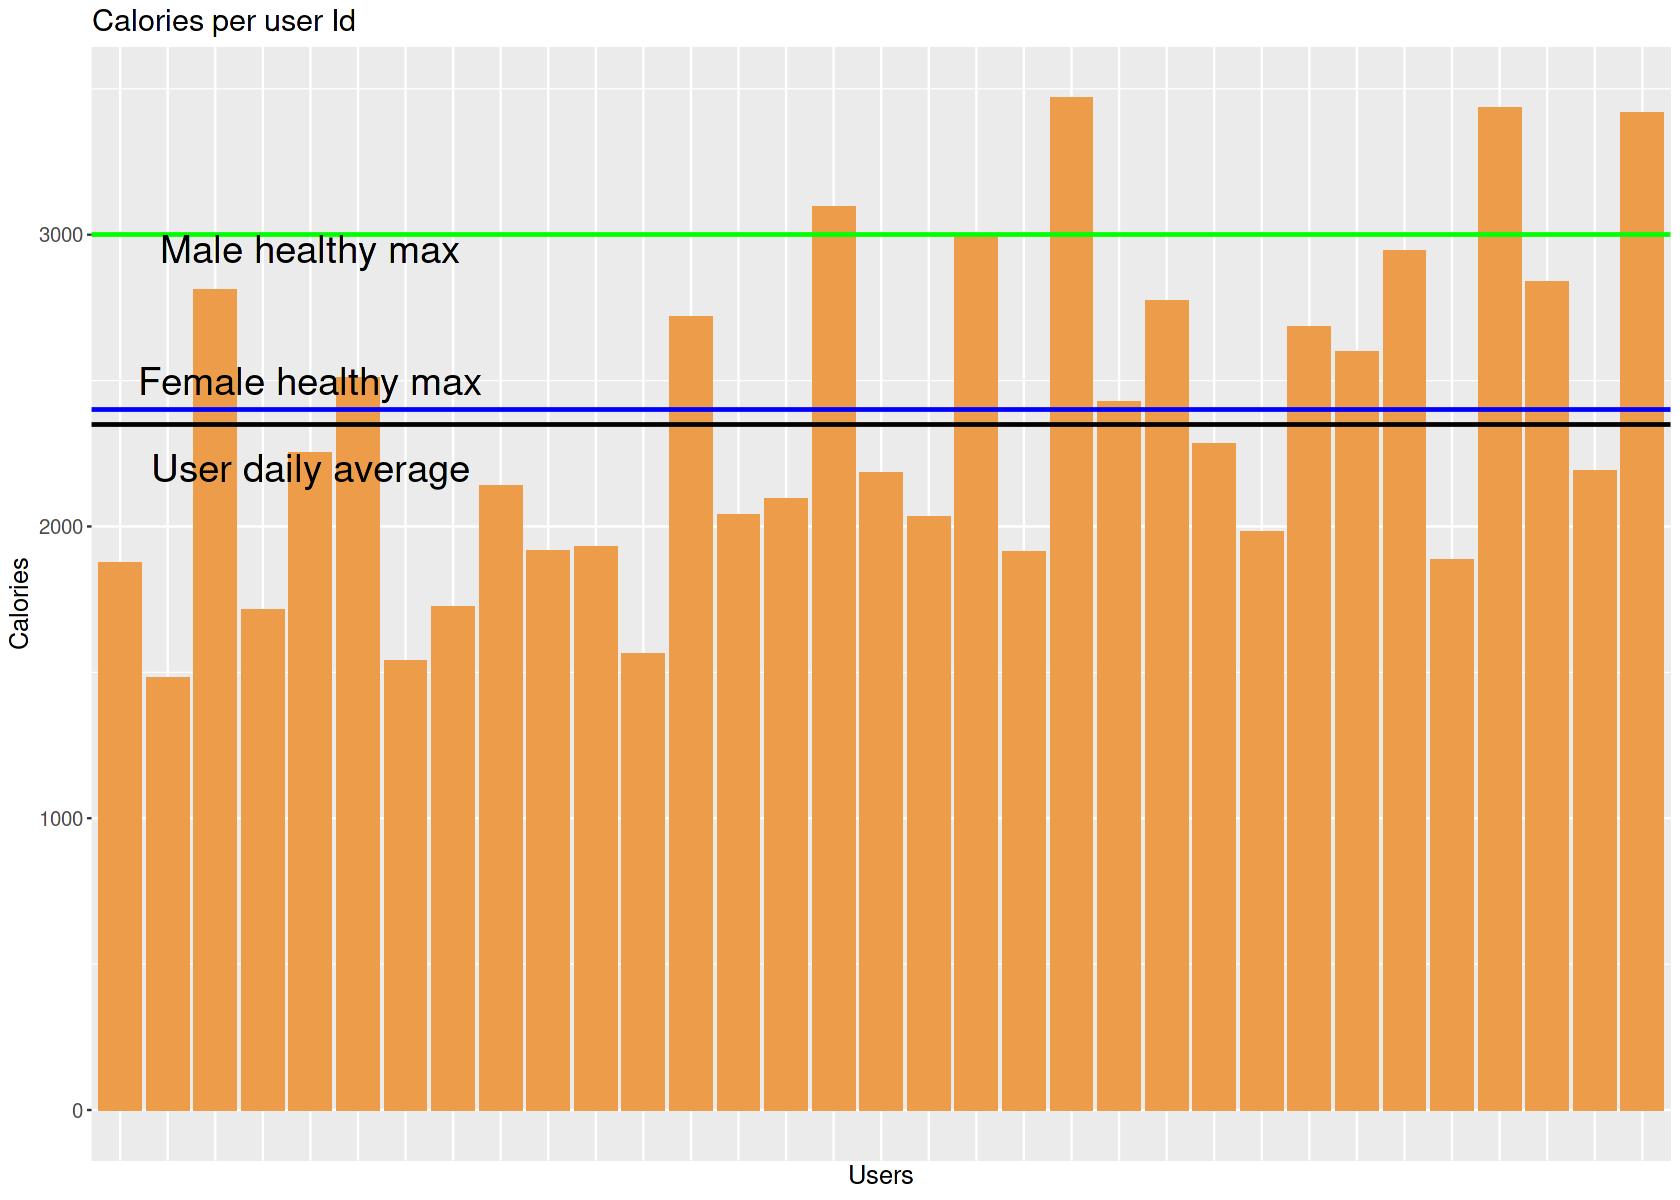

In [40]:
# plot calories per user Id
ggplot(activity_calorie_avg) + 
    geom_bar(stat = "identity", aes(x = Id, y = Calories), fill = "#ED9D4A") +
    labs(title = "Calories per user Id", x = "Users") + 
    theme(text = element_text(size = 15)) +
    geom_hline(yintercept = 3000, colour = "green", size=1) +
    annotate("text", x = 5, y = 2950, label = "Male healthy max",size= 8) +
    geom_hline(yintercept = 2400, colour = "blue", size=1) +
    annotate("text", x = 5, y = 2500, label = "Female healthy max",size= 8) +
    geom_hline(yintercept = cal_avg, colour = "black", size=1) +
    annotate("text", x = 5, y = 2200, label = "User daily average",size= 8) +
    guides(x = 'none')

For weight maintance or loss, the average female between 19 and 30 should consume less than 2400 calories. That number is 3000 calories for men in that age range [[3]](#cite_3). For 19 users, they are burning below the 2400 calorie threshold which mean if they are similar enough to the average female and eat in excess of their average calorie intake, they will gain weight. There are 4 users who burn above 3000 calories which can be a healthy amount depending on gender, activity level, and weight goals. the remaining 7 fall between 2400 and 3000 calories and without additional information analysis is limited.

In [41]:
# Identify trends based on day of the week
daily_activity$Weekday = weekdays(daily_activity$Datet)
by_weekday <- daily_activity %>% 
  group_by(Weekday) %>% 
  summarise(Calories = round(mean(Calories)),
           Steps = round(mean(TotalSteps)),
           Distance = round(mean(TotalDistance),1))

In [42]:
by_weekday

Weekday,Calories,Steps,Distance
<chr>,<dbl>,<dbl>,<dbl>
Friday,2368,7886,5.6
Monday,2381,8488,6.1
Saturday,2426,8979,6.4
Sunday,2310,7669,5.6
Thursday,2295,8224,5.9
Tuesday,2434,8927,6.4
Wednesday,2355,8245,6.0


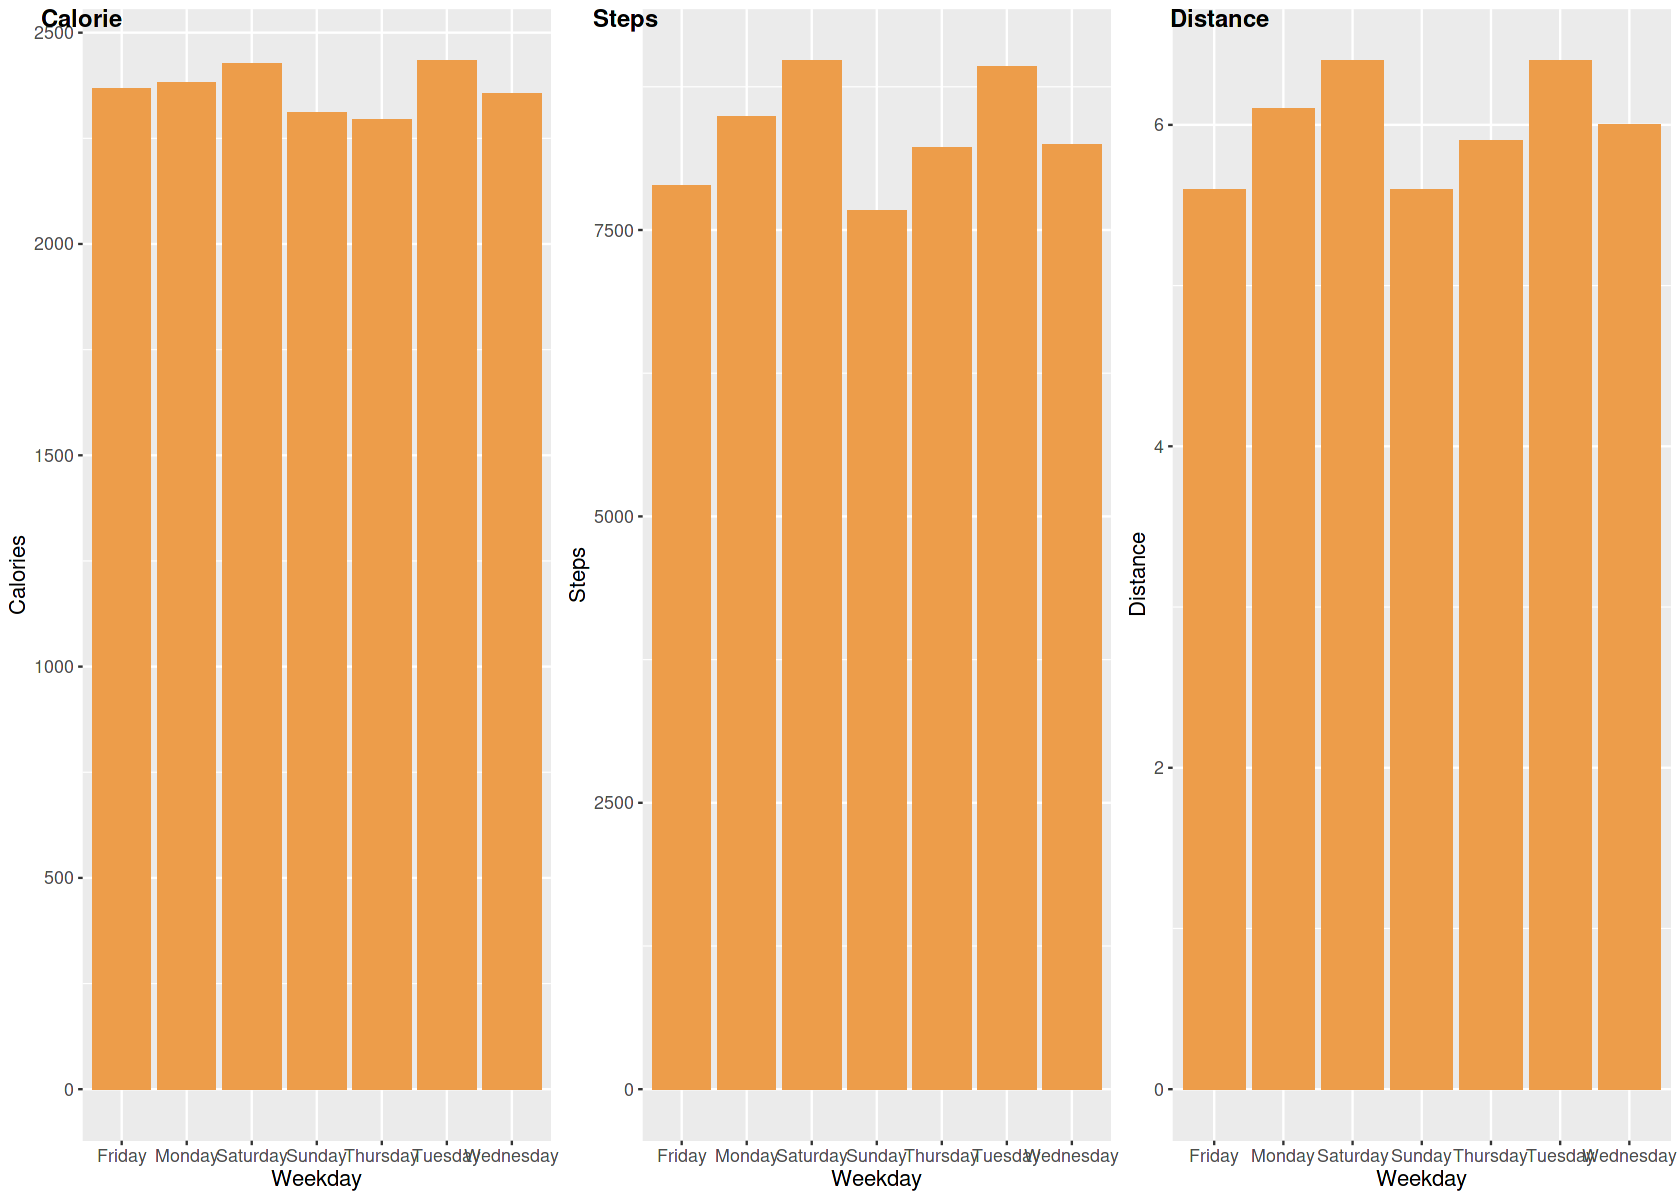

In [43]:
cal <- ggplot(by_weekday) +
    geom_bar(stat = "identity", aes(x= Weekday, y= Calories), fill = "#ED9D4A")+ 
    theme(text = element_text(size = 13))
step <- ggplot(by_weekday) +
    geom_bar(stat = "identity", aes(x= Weekday, y= Steps), fill = "#ED9D4A")+ 
    theme(text = element_text(size = 13))
dist <- ggplot(by_weekday) +
    geom_bar(stat = "identity", aes(x= Weekday, y= Distance), fill = "#ED9D4A")+ 
    theme(text = element_text(size = 13))
ggarrange(cal, step, dist, 
          labels = c("Calorie", "Steps", "Distance"),
          ncol = 3, nrow = 1)

The change in the bar graphs shows that throughout the week there is some variation but no overall significant trend that favors a certain weekday.

#### <span style="color:#ED9D4A">4.2.2 Hour and sleep data analysis</span>  <a class="anchor" id="head_4_2_2"></a>

In [44]:
# combining hour data into on dataframe
merged_hour_data <- merge(hourly_calories, hourly_steps, by= c('Id', 'Datet'))
merged_hour_data <- merge(merged_hour_data, hourly_intensities, by= c('Id','Datet'))
merged_hour_data$hour <- format(merged_hour_data$Datet, format = "%H:%M")

In [45]:
head(merged_hour_data)

,Id,Datet,Dt.x,Calories,Dt.y,Steps,Dt,TotalIntensity,AverageIntensity,hour
,<fct>,<dttm>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>
1,1503960366,2016-04-12 00:00:00,4-12-2016 12:00:00 AM,81,4-12-2016 12:00:00 AM,373,4-12-2016 12:00:00 AM,20,0.333333,00:00
2,1503960366,2016-04-12 01:00:00,4-12-2016 1:00:00 AM,61,4-12-2016 1:00:00 AM,160,4-12-2016 1:00:00 AM,8,0.133333,01:00
3,1503960366,2016-04-12 02:00:00,4-12-2016 2:00:00 AM,59,4-12-2016 2:00:00 AM,151,4-12-2016 2:00:00 AM,7,0.116667,02:00
4,1503960366,2016-04-12 03:00:00,4-12-2016 3:00:00 AM,47,4-12-2016 3:00:00 AM,0,4-12-2016 3:00:00 AM,0,0.000000,03:00
5,1503960366,2016-04-12 04:00:00,4-12-2016 4:00:00 AM,48,4-12-2016 4:00:00 AM,0,4-12-2016 4:00:00 AM,0,0.000000,04:00
6,1503960366,2016-04-12 05:00:00,4-12-2016 5:00:00 AM,48,4-12-2016 5:00:00 AM,0,4-12-2016 5:00:00 AM,0,0.000000,05:00


In [46]:
# getting average values based on hour of day
merged_hour_data <- merged_hour_data %>%
    group_by(hour) %>%
    summarise(AverageCalories= mean(Calories),
              AverageSteps= mean(Steps),
              AverageIntensity= mean(AverageIntensity))
head(merged_hour_data)

hour,AverageCalories,AverageSteps,AverageIntensity
<chr>,<dbl>,<dbl>,<dbl>
00:00,71.80514,42.188437,0.035492524
01:00,70.16506,23.102894,0.023651328
02:00,69.18650,17.110397,0.017399091
03:00,67.53805,6.426581,0.007395519
04:00,68.26180,12.699571,0.010550801
05:00,81.70815,43.869099,0.082510751


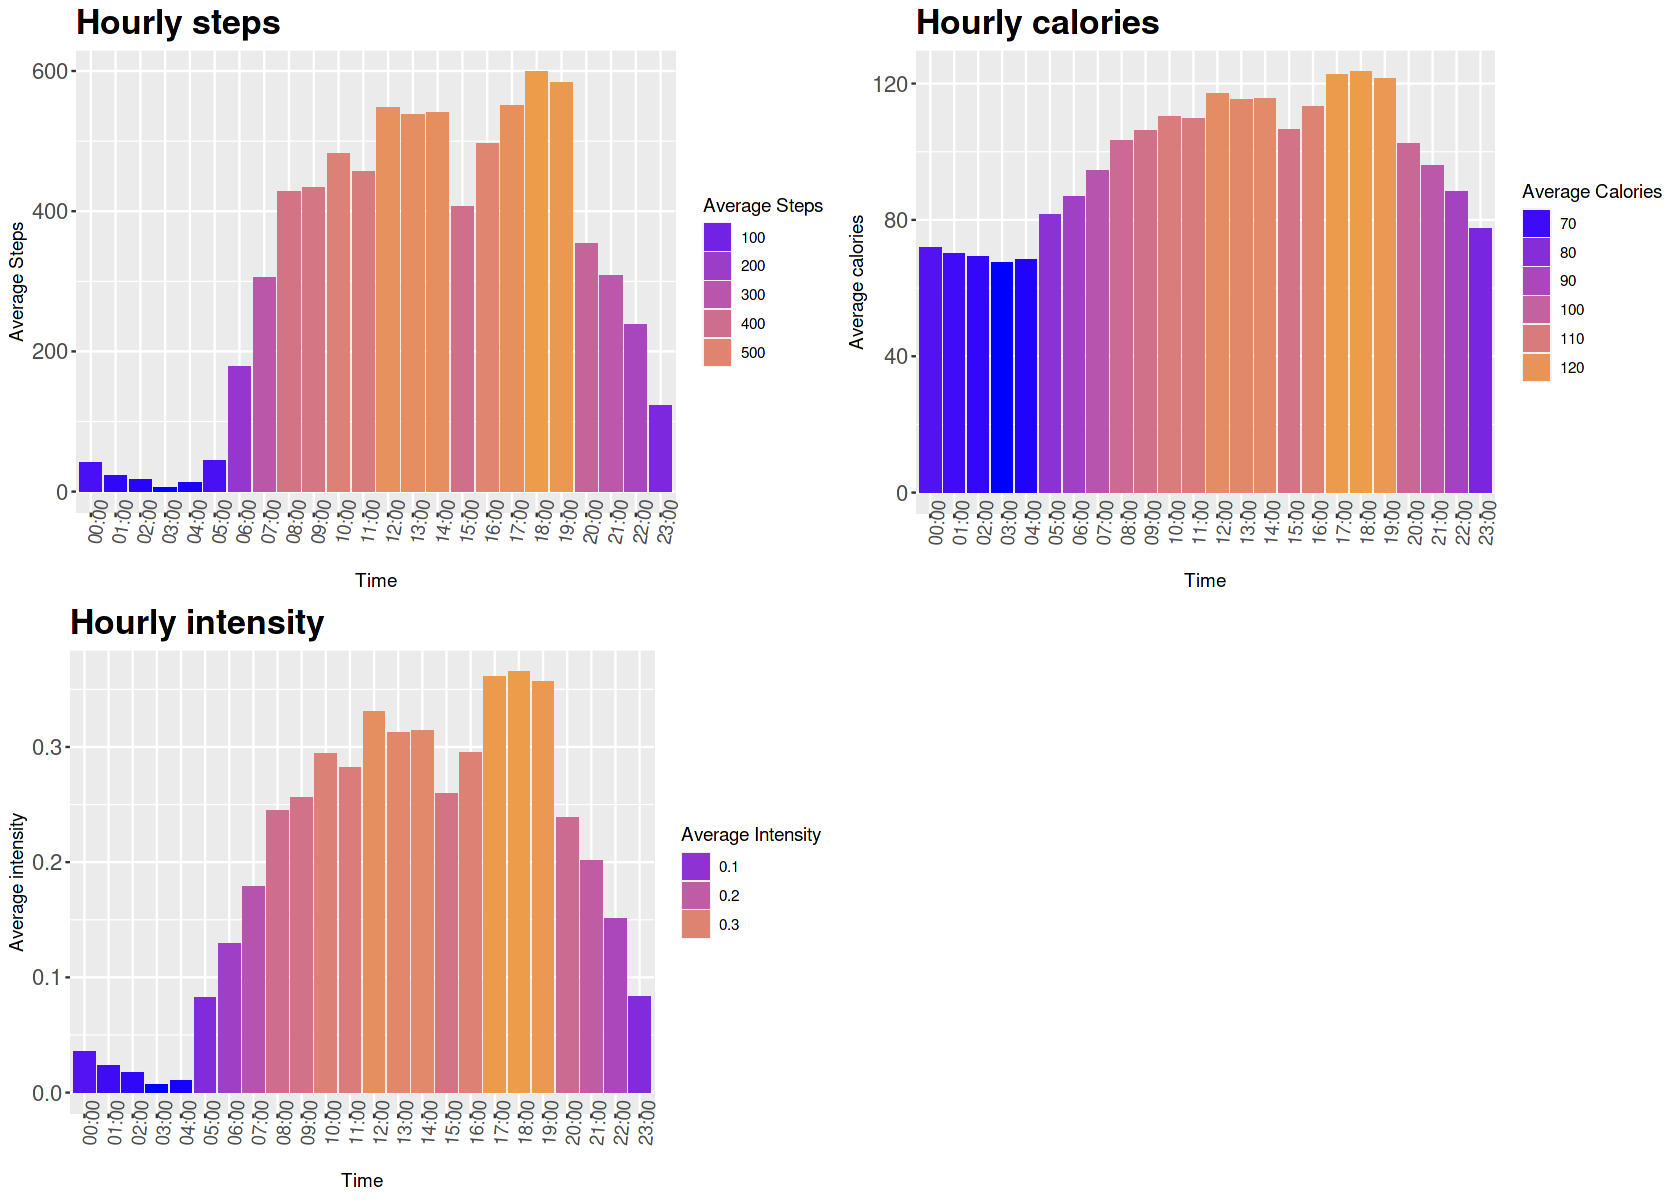

In [47]:
# plot average based on hour of day
ggarrange(
ggplot(data=merged_hour_data)+
  geom_col(mapping = aes(x=hour,y=AverageSteps, fill=AverageSteps))+
  scale_fill_gradient(low = "blue", high = "#ED9D4A")+
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 80, size=11),
        axis.text.y = element_text(size=13))+
  labs(title = "Hourly steps", x="Time", y="Average Steps")+
  guides(fill = guide_legend(title = "Average Steps")),  
ggplot(data=merged_hour_data)+
  geom_col(mapping = aes(x=hour,y=AverageCalories, fill=AverageCalories))+
  scale_fill_gradient(low = "blue", high = "#ED9D4A")+
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 85, size=11),
        axis.text.y = element_text(size=13))+
  labs(title = "Hourly calories", x="Time", y="Average calories")+
  guides(fill = guide_legend(title = "Average Calories")),
ggplot(data=merged_hour_data)+
  geom_col(mapping = aes(x=hour,y=AverageIntensity, fill=AverageIntensity))+
  scale_fill_gradient(low = "blue", high = "#ED9D4A")+
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 85, size=11),
        axis.text.y = element_text(size=13))+
  labs(title = "Hourly intensity", x="Time", y="Average intensity")+
  guides(fill = guide_legend(title = "Average Intensity"))
)

It seems that most activity takes place in a 3 hour period either before 2 PM or after 5 PM. This period between 2 and 4 may be a good time for motivation or a reminder since the most active period comes directly after. these two periods are important for understanding how to get users more engaged by focusing on when they are most likely to be doing higher intensity activities. It may also be beneficial to identify low intensity time ranges inorder to encourge more light activity rather than being sedentary.

In [48]:
# Identify trends in sleep htrough correlation and day of week
activity_sleep$Weekday = weekdays(activity_sleep$Datet)
activity_sleep <- na.omit(activity_sleep)
cor(subset(activity_sleep, select = -c(Id, Dt.x, Dt.y, Datet, Weekday)))
hours_asleep <- activity_sleep %>%
    group_by(Id) %>%
    summarise(AvgHoursAsleep= round(mean(TotalMinutesAsleep/60),1))

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
TotalSteps,1.00000000,0.98131930,0.98145022,0.11301319,0.68137729,0.57865880,0.573045414,0.046662840,0.54275096,0.56707366,0.399243153,-0.19602623,0.38611310,-0.16767894,-0.19784438,-0.17306838
TotalDistance,0.98131930,1.00000000,0.99954443,0.16690409,0.70869229,0.55756221,0.582993199,0.059624607,0.57694278,0.54701950,0.366034511,-0.19069232,0.50597357,-0.14864290,-0.18392863,-0.16764852
TrackerDistance,0.98145022,0.99954443,1.00000000,0.15444074,0.70773166,0.55625139,0.584110743,0.039247807,0.57663475,0.54717729,0.366550739,-0.19080266,0.50726674,-0.14829069,-0.18460435,-0.16784464
LoggedActivitiesDistance,0.11301319,0.16690409,0.15444074,1.00000000,0.18767924,0.02677244,0.062029077,0.382026699,0.33492046,-0.02349507,-0.089532234,0.02031280,0.31694555,-0.04581656,-0.03938806,-0.05873729
VeryActiveDistance,0.68137729,0.70869229,0.70773166,0.18767924,1.00000000,0.22724751,-0.045201860,0.052532919,0.84844155,0.28844135,-0.179282964,-0.01198879,0.43857715,-0.09639342,-0.10478723,-0.11229858
ModeratelyActiveDistance,0.57865880,0.55756221,0.55625139,0.02677244,0.22724751,1.00000000,0.138776100,0.065487695,0.18550126,0.94505469,0.015299402,-0.06370693,0.06130298,-0.06391264,-0.24696907,-0.10044811
LightActiveDistance,0.57304541,0.58299320,0.58411074,0.06202908,-0.04520186,0.13877610,1.000000000,0.001325871,-0.07480343,0.07576436,0.847541788,-0.28806259,0.30978713,-0.10696561,-0.05613449,-0.10439555
SedentaryActiveDistance,0.04666284,0.05962461,0.03924781,0.38202670,0.05253292,0.06548769,0.001325871,1.000000000,0.01875910,0.02710467,0.004399669,0.03653652,0.02712032,-0.03717469,-0.03879036,-0.05475813
VeryActiveMinutes,0.54275096,0.57694278,0.57663475,0.33492046,0.84844155,0.18550126,-0.074803434,0.018759096,1.00000000,0.32063836,-0.220186365,-0.03663081,0.61524692,-0.12123745,-0.08998173,-0.11143891
FairlyActiveMinutes,0.56707366,0.54701950,0.54717729,-0.02349507,0.28844135,0.94505469,0.075764356,0.027104671,0.32063836,1.00000000,-0.031935558,-0.06555160,0.16681373,-0.07885761,-0.25187293,-0.11648039


It seems that the only strongly correlated value for time spent asleep is sedentary minutes.

In [49]:
# find average sleep time for users
hours_asleep
length(grep(TRUE, hours_asleep$AvgHoursAsleep >= 8))
length(grep(TRUE, hours_asleep$AvgHoursAsleep < 5))

Id,AvgHoursAsleep
<fct>,<dbl>
1503960366,6.0
1644430081,4.9
1844505072,10.9
1927972279,7.0
2026352035,8.4
2320127002,1.0
2347167796,7.5
3977333714,4.9
4020332650,5.8


[1] 4

[1] 5

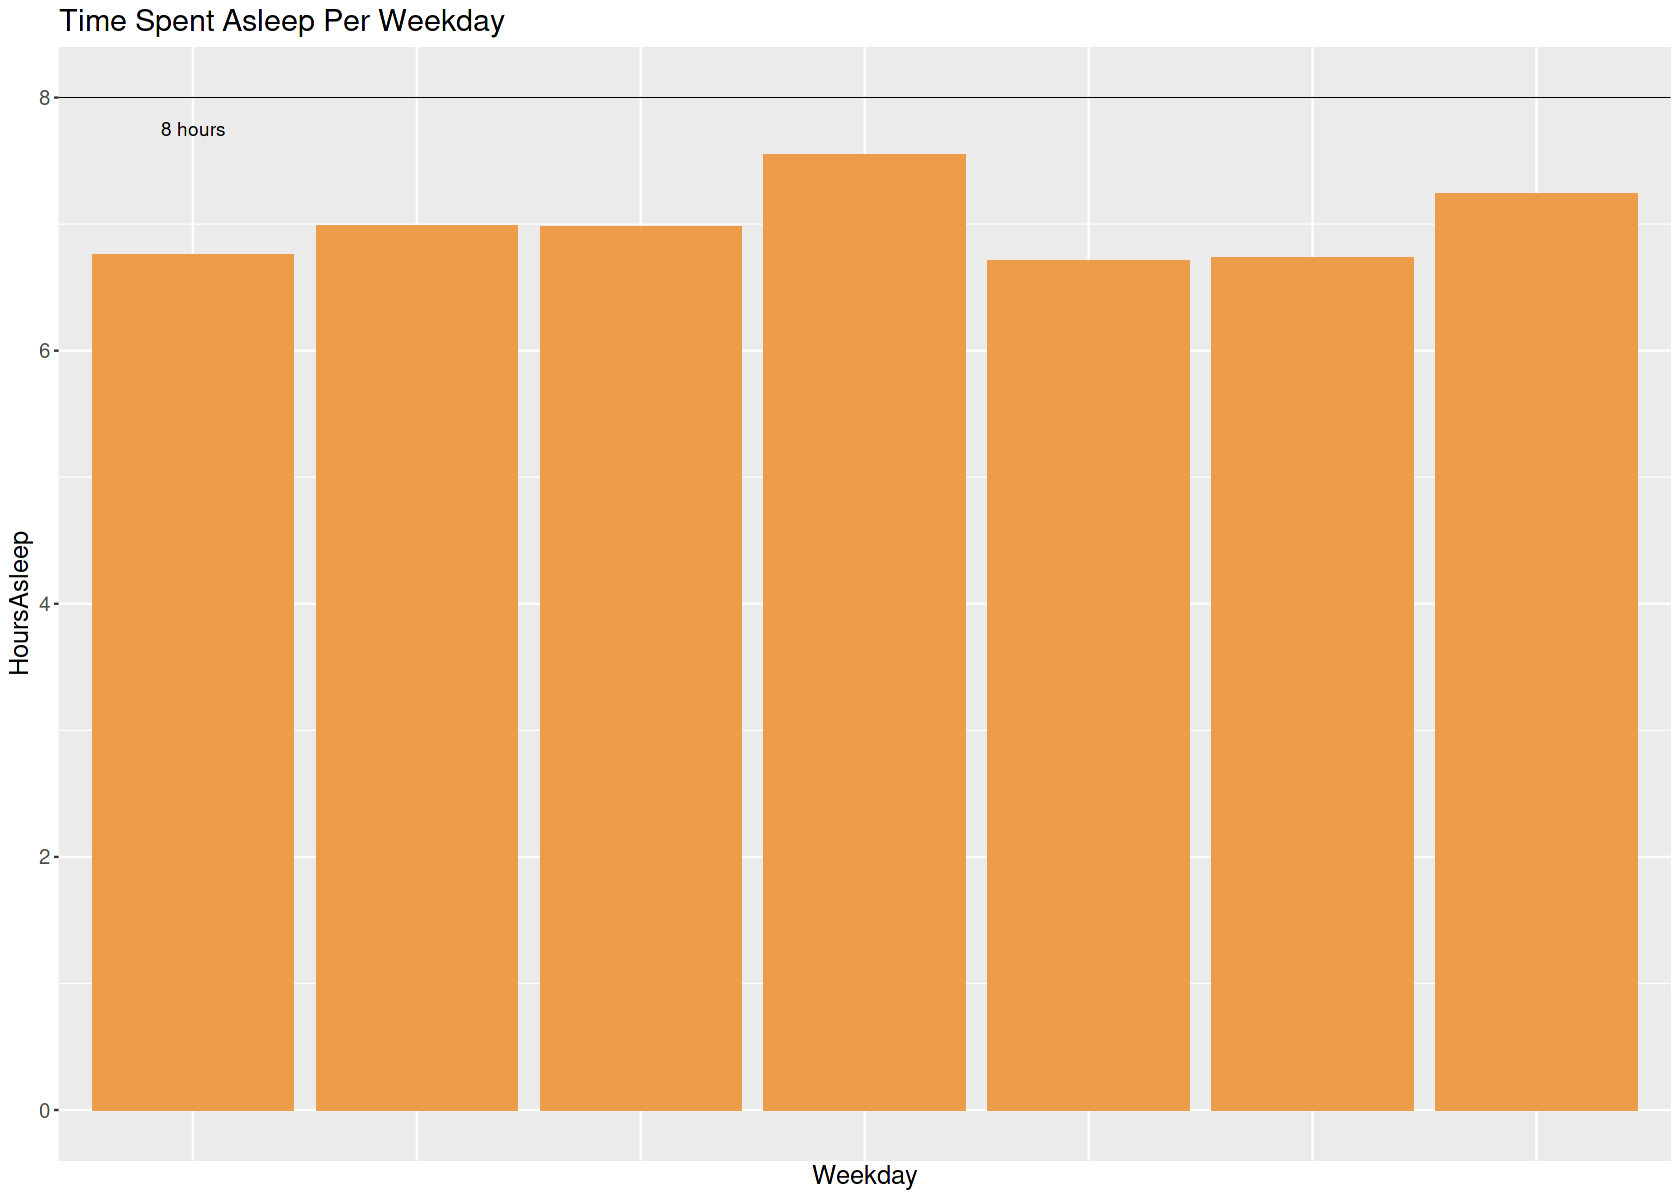

In [50]:
#plot day of week vs average amount of sleep
sleep_by_weekday <- activity_sleep %>%
    group_by(Weekday) %>%
    summarise(HoursAsleep= round(mean(TotalMinutesAsleep/60),2))

ggplot(sleep_by_weekday) +
    geom_bar(stat = "identity", aes(x= Weekday, y= HoursAsleep), fill = "#ED9D4A")+ 
    geom_hline(yintercept= 8, color= "black", size= .25) +
    annotate("text", x = 1, y= 7.75, label = "8 hours") +
    labs(title = "Time Spent Asleep Per Weekday", x = "Weekday") + 
    guides(x = "none") +
    theme(text = element_text(size = 15))    

`geom_smooth()` using formula 'y ~ x'



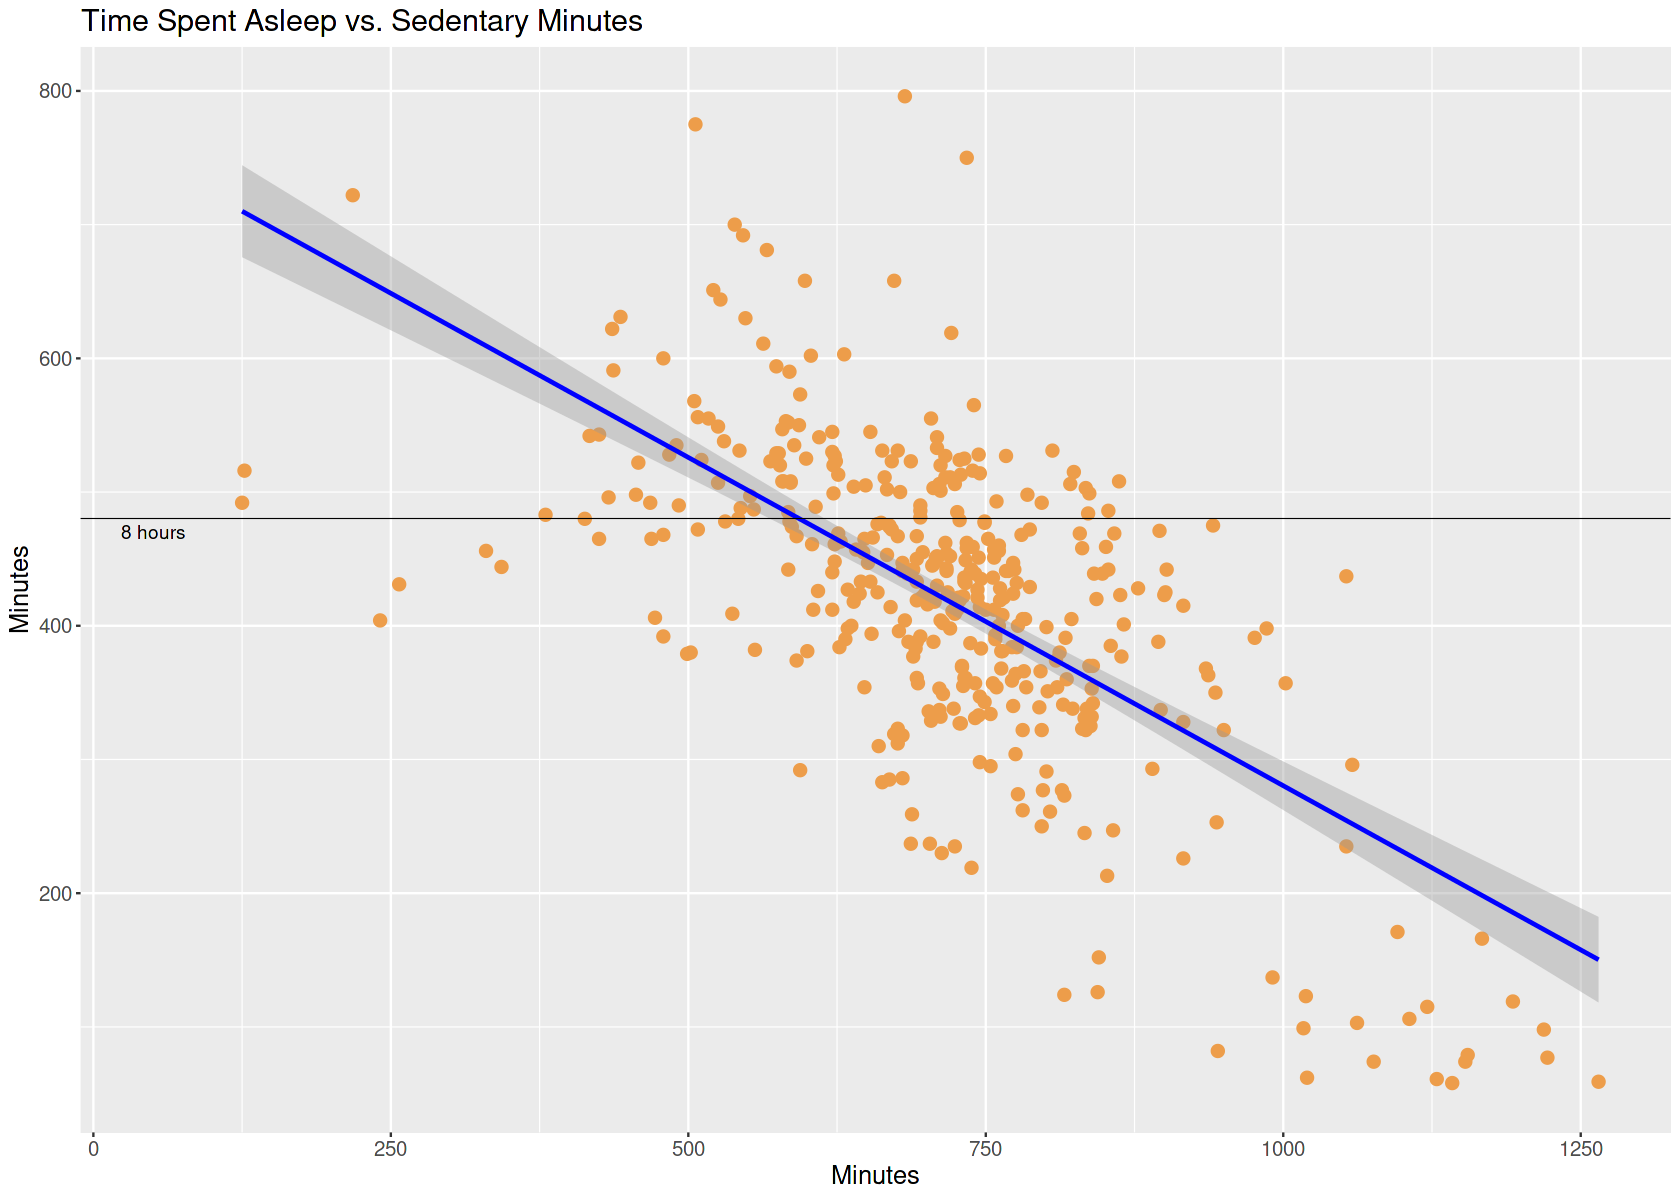

In [51]:
# plotting highest correlated value (sedentary minutes) with Time spent asleeep
ggplot(activity_sleep, aes(x= SedentaryMinutes, y= TotalMinutesAsleep)) + 
    geom_point(size= 3, color="#ED9D4A") +
    geom_smooth(method= 'lm', color= 'blue') +
    geom_hline(yintercept= 480, color= "black", size= .25) +
    annotate("text", x = 50, y= 470, label = "8 hours") +
    labs(title = "Time Spent Asleep vs. Sedentary Minutes", x = "Minutes", y = "Minutes") + 
    theme(text = element_text(size = 15) ) 

This sleep data tells us much about the particapants. Only 4 get the recommended 8 hours of sleep and 5 get less than 5 hours. Sleep has been showed to be tied with appetite, metabolism, obesity, physical activity, and weight loss [[4]](#cite_4). There has been a steady trend over the past decades that show as sleep time has steadliy decreased, BMI has increased. We also see that the more a person spends sedentary, the less sleep they get. As execrise can be associated with better and longer sleep habits, it is important to implement strategies that get people more active to prove this correlation. This area of health could be the most impacted by health managment products as increasing the amount a person sleeps can affect almost all other aspect of health.

----
## <span style="color:#ED9D4A">5. Conclusion </span>  <a class="anchor" id="head_5"></a>

### <span style="color:#ED9D4A">5.1 Insights</span>  <a class="anchor" id="head_5_1"></a>


* Introducing more **short high intensity activities**, that have instructions or a programs attached, could give users the guidance and motivation to become more active.


* Strategies that encourge **less sedentary time**, through reminders or incentives, can keep users more invested and mindful about their health journey.


* Notification that remind users to wind down and prepare for bed as well as tools to help people **fall asleep and stay asleep**, through relaxation excerises or meditation, can have a strong impact on health outcomes.

### <span style="color:#ED9D4A">5.2 Strategy</span>  <a class="anchor" id="head_5_2"></a>

1. Develop data gathering infrastructure to test and refine product changes
2. Refine insights with target market focus into applicable strategy that are within business means
3. Test and use data to develop Bellabeat specific insigts

----
## <span style="color:#ED9D4A">6. Bibliography </span>  <a class="anchor" id="head_6"></a>

[1] “Deploy. Measure. Collect”. Fitabase. Small Steps Labs, LLC. 2018. Web. <a class="anchor" id="cite_1"></a>

[2] Ramesh, S., Choe, E., Taylor, C. Survey on Health Device Use by MTurk Participants January 2018. <a class="anchor" id="cite_2"></a>

[3] U.S. Department of Agriculture and U.S. Department of Health and Human Services. Dietary Guidelines for Americans, 2020-2025. 9th Edition. December 2020. <a class="anchor" id="cite_3"></a>

[4] Newsom, Rob. “Why Is Sleep so Important to Weight Loss?” Sleep Foundation, 9 Oct. 2020, https://www.sleepfoundation.org/physical-health/weight-loss-and-sleep. <a class="anchor" id="cite_4"></a>

Thank you for reviewing my notebook, please leave a comment with any notes or reccomendations. I would very much appreciate the feedback!